In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text cleaning
import re

# Saving/loading models
import joblib

# Text vectorization
from sentence_transformers import SentenceTransformer          # Embeddings (BERT-style)
from sklearn.feature_extraction.text import CountVectorizer     # Word counts for charts

# Model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC                                     # Support Vector Machine
from xgboost import XGBClassifier                               # Gradient boosting model

# Model selection & evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)


In [2]:
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=3, linewidth=100)
sns.set()

## 📦 Imports & Their Purpose

### 🔹 **1. Data Handling**

| Module   | Purpose                                 | Use in Project                                       |
| -------- | --------------------------------------- | ---------------------------------------------------- |
| `pandas` | Work with structured data (DataFrames). | Load, clean, and manipulate review data.             |
| `numpy`  | Numerical operations.                   | Percentages, arrays, and basic numeric calculations. |

```python
import pandas as pd
import numpy as np
```

---

### 🎨 **2. Visualization**

| Module              | Purpose                         | Use in Project                                       |
| ------------------- | ------------------------------- | ---------------------------------------------------- |
| `matplotlib.pyplot` | Plotting library.               | Bar charts, pie charts, histograms.                  |
| `seaborn`           | Statistical data visualization. | Clean, styled plots (e.g., count plots, bar plots).  |
| `WordCloud`         | Word frequency cloud.           | Visualize common words in positive/negative reviews. |

```python
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
```

---

### 🧼 **3. Text Preprocessing**

| Module | Purpose              | Use in Project                                           |
| ------ | -------------------- | -------------------------------------------------------- |
| `re`   | Regular expressions. | Clean text by removing punctuation, symbols, and digits. |

```python
import re
```

---

### 💾 **4. Model Saving & Loading**

| Module   | Purpose                         | Use in Project                                 |
| -------- | ------------------------------- | ---------------------------------------------- |
| `joblib` | Save/load large Python objects. | Save trained model and embedder for Flask app. |

```python
import joblib
```

---

### 🔤 **5. Text Vectorization & Embedding**

| Module                | Purpose                                | Use in Project                                   |
| --------------------- | -------------------------------------- | ------------------------------------------------ |
| `SentenceTransformer` | Turn sentences into vector embeddings. | Convert reviews to 384-d vector representations. |
| `CountVectorizer`     | Word frequency count matrix.           | For visualizing top words in review texts.       |

```python
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
```

---

### 🧠 **6. Machine Learning Models**

| Model                    | Purpose                     | Use in Project                       |
| ------------------------ | --------------------------- | ------------------------------------ |
| `LogisticRegression`     | Linear classifier.          | Baseline sentiment classifier.       |
| `DecisionTreeClassifier` | Tree-based model.           | Easy to interpret; quick comparison. |
| `RandomForestClassifier` | Ensemble of decision trees. | More accurate; avoids overfitting.   |
| `SVC (SVM)`              | Support vector machine.     | High-dimensional classifier.         |
| `XGBClassifier`          | Gradient boosting.          | High-performance ensemble model.     |

```python
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
```

---

### 🧪 **7. Model Evaluation & Selection**

| Module                   | Purpose                      | Use in Project                            |
| ------------------------ | ---------------------------- | ----------------------------------------- |
| `train_test_split`       | Train/test split.            | Split dataset for validation.             |
| `cross_val_score`        | K-fold cross-validation.     | Evaluate generalization of models.        |
| `classification_report`  | Precision, recall, F1-score. | Evaluate model performance.               |
| `accuracy_score`         | Accuracy metric.             | Total correct predictions.                |
| `precision_score`        | Precision metric.            | True positives among predicted positives. |
| `recall_score`           | Recall metric.               | True positives among actual positives.    |
| `f1_score`               | F1 score.                    | Balance of precision and recall.          |
| `ConfusionMatrixDisplay` | Confusion matrix plot.       | Visualize classification errors.          |

```python
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)
```

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/amazon_alexa.tsv'

In [5]:
df = pd.read_csv(file_path, delimiter = '\t', quoting = 3)
df.shape

(3150, 5)

In [6]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [8]:
df.dtypes

,0
rating,int64
date,object
variation,object
verified_reviews,object
feedback,int64


In [9]:
df.isnull().sum()
#Single record in 'verified_review' with a null value

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [10]:
null_val = df[df['verified_reviews'].isna()]
print(null_val)

     rating       date variation verified_reviews  feedback
473       2  29-Jun-18     White              NaN         0


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,0
feedback,0


In [13]:
print(f"Dataset shape after dropping null values : {df.shape}")

Dataset shape after dropping null values : (3149, 5)


# Analyzing 'rating' column

In [14]:
df['rating'].value_counts()

,count
rating,
5,2286
4,455
1,161
3,152
2,95


Text(0.5, 1.0, 'Rating Distribution')

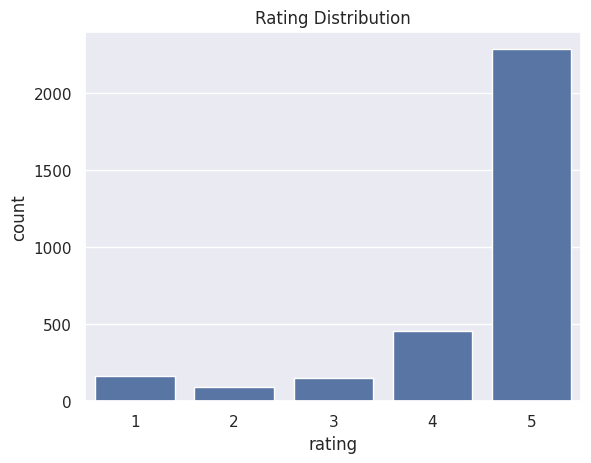

In [15]:
sns.countplot(data=df, x='rating', order=sorted(df['rating'].unique()))
plt.title("Rating Distribution")

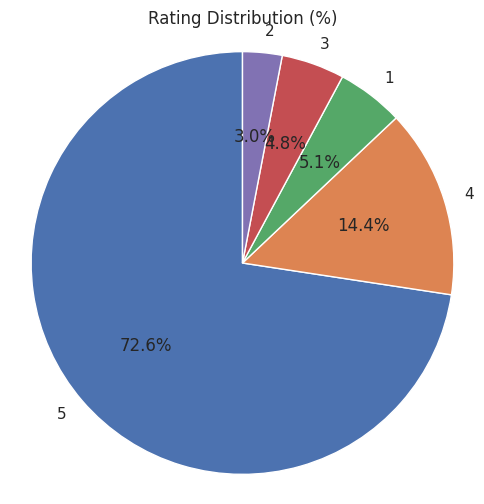

In [16]:
# Calculate value counts as percentages
rating_counts = df['rating'].value_counts(normalize=True) * 100
rating_labels = rating_counts.index.astype(str)
rating_values = rating_counts.values

# Plot
plt.figure(figsize=(6, 6))
plt.pie(rating_values, labels=rating_labels, autopct='%1.1f%%', startangle=90)
plt.title('Rating Distribution (%)')
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.show()


Analyzing 'feedback' column which is verified review

In [17]:
df['feedback'].value_counts()

,count
feedback,
1,2893
0,256


In [18]:
#Extracting the 'verified_reviews' value for one record with feedback = 0
df.loc[df['feedback'] == 0, 'verified_reviews'].iloc[1]

'Sound is terrible if u want good music too get a bose'

In [19]:
#Extracting the 'verified_reviews' value for one record with feedback = 1
df.loc[df['feedback'] == 1, 'verified_reviews'].iloc[1]

'Loved it!'

Text(0.5, 1.0, 'feedback Distribution')

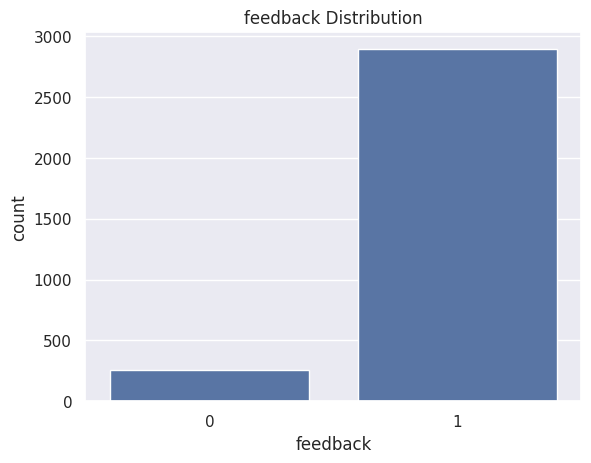

In [20]:
sns.countplot(data=df, x='feedback', order=sorted(df['feedback'].unique()))
plt.title("feedback Distribution")

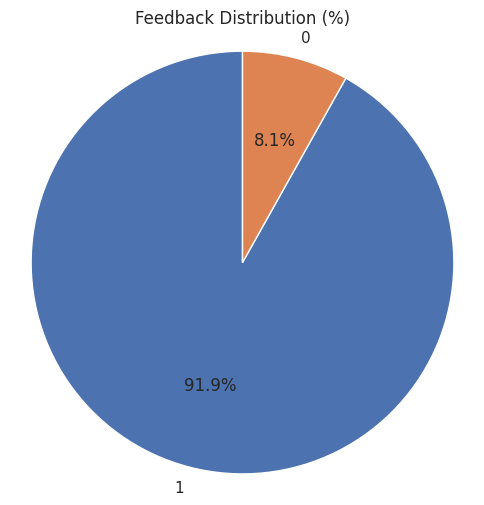

In [21]:
# Calculate value counts as percentages
rating_counts = df['feedback'].value_counts(normalize=True) * 100
rating_labels = rating_counts.index.astype(str)
rating_values = rating_counts.values

# Plot
plt.figure(figsize=(6, 6))
plt.pie(rating_values, labels=rating_labels, autopct='%1.1f%%', startangle=90)
plt.title('Feedback Distribution (%)')
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.show()


In [22]:
df[df['feedback'] == 0] ['rating'].value_counts()

,count
rating,
1,161
2,95


In [23]:
df[df['feedback']==1] ['rating'].value_counts()

,count
rating,
5,2286
4,455
3,152


For the ratings 1 and 2 the feedback is 0 (negative) and for ratings 3,4,5 the feedback is 1 (positive)

# Analyzing 'variation' column

The column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [24]:
df['variation'].value_counts()

,count
variation,
Black Dot,516
Charcoal Fabric,430
Configuration: Fire TV Stick,350
Black Plus,270
Black Show,265
Black,261
Black Spot,241
White Dot,184
Heather Gray Fabric,157


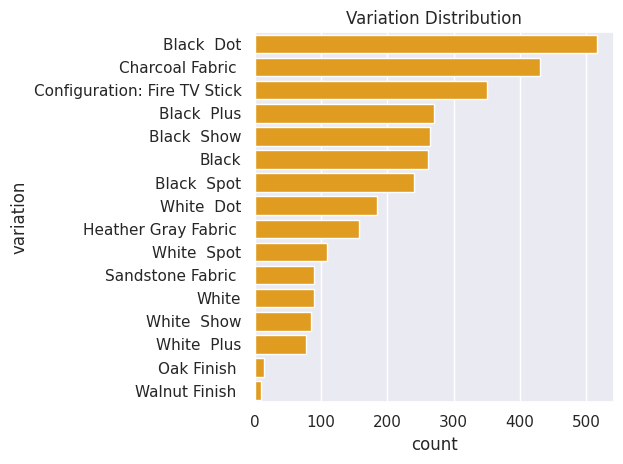

In [25]:
sns.countplot(data=df, y='variation', color='orange', order=df['variation'].value_counts().index)
plt.title("Variation Distribution")
plt.tight_layout()
plt.show()

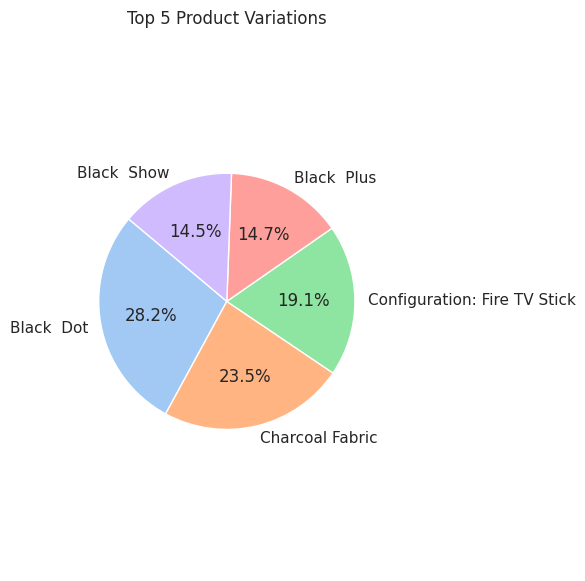

In [26]:
sns.set_palette("pastel")
sns.set_style("whitegrid")

top_variations = df['variation'].value_counts().nlargest(5)

plt.figure(figsize=(6, 6))
plt.pie(top_variations.values,
        labels=top_variations.index,
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops={'edgecolor': 'white'})
plt.title("Top 5 Product Variations")
plt.axis('equal')  # Keep it circular
plt.tight_layout()
plt.show()

In [27]:
sns.set(style="whitegrid", palette="pastel")

variation_percent = df['variation'].value_counts(normalize=True) * 100
variation_percent = variation_percent.round(2)
print(variation_percent)

variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: proportion, dtype: float64


🔢 Percentage Distribution of Product Variations:


,Percentage (%)
variation,
Black Dot,16.39
Charcoal Fabric,13.66
Configuration: Fire TV Stick,11.11
Black Plus,8.57
Black Show,8.42
Black,8.29
Black Spot,7.65
White Dot,5.84
Heather Gray Fabric,4.99


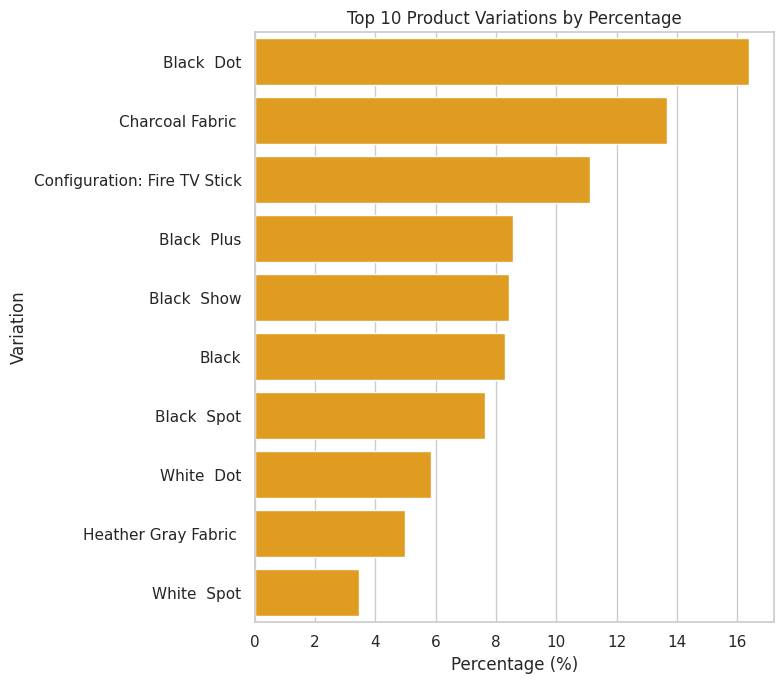

In [28]:
print("🔢 Percentage Distribution of Product Variations:")
display(variation_percent.to_frame(name="Percentage (%)"))

top_n = 10
top_variations = variation_percent.head(top_n)

plt.figure(figsize=(8, 7))
sns.barplot(y=top_variations.index, x=top_variations.values, color='orange')
plt.title(f"Top {top_n} Product Variations by Percentage")
plt.xlabel("Percentage (%)")
plt.ylabel("Variation")
plt.tight_layout()
plt.show()

In [29]:
mean_rating = df.groupby('variation')['rating'].mean().sort_values()

print("⭐ Mean Rating per Variation:")
display(mean_rating.to_frame(name="Average Rating").head(10))


⭐ Mean Rating per Variation:


,Average Rating
variation,
White,4.167
Black,4.234
White Show,4.282
Black Spot,4.311
White Spot,4.312
Sandstone Fabric,4.356
White Plus,4.359
Black Plus,4.370
White Dot,4.424


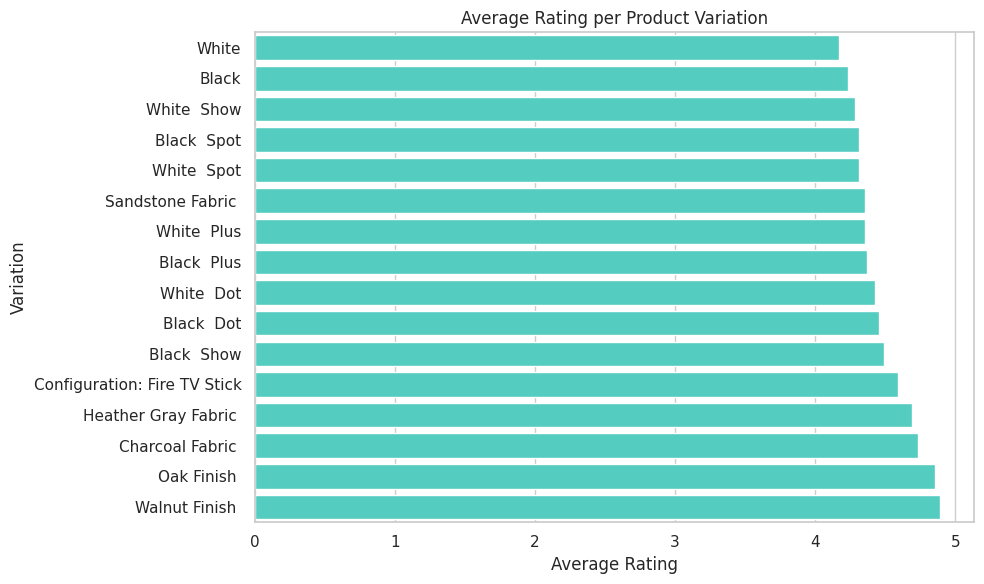

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_rating.values, y=mean_rating.index, color='turquoise')
plt.title("Average Rating per Product Variation")
plt.xlabel("Average Rating")
plt.ylabel("Variation")
plt.tight_layout()
plt.show()

# Analyzing 'verified_reviews' column

The column contains the textual review given by the user for a variation of the product.

In [31]:
# Add a 'length' column for each review
df['length'] = df['verified_reviews'].apply(len)
df['length']

,length
0,13
1,9
2,197
3,174
4,5
...,...
3145,52
3146,137
3147,443
3148,382


In [32]:
df['length'].describe()

,length
count,3149.000
mean,132.715
std,182.542
min,1.000
25%,30.000
50%,74.000
75%,166.000
max,2853.000


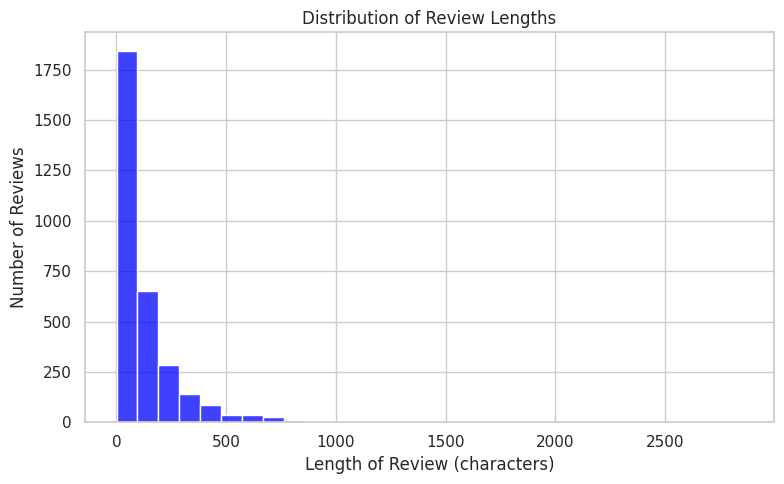

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(df['length'], color='blue', bins=30)
plt.title("Distribution of Review Lengths")
plt.xlabel("Length of Review (characters)")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

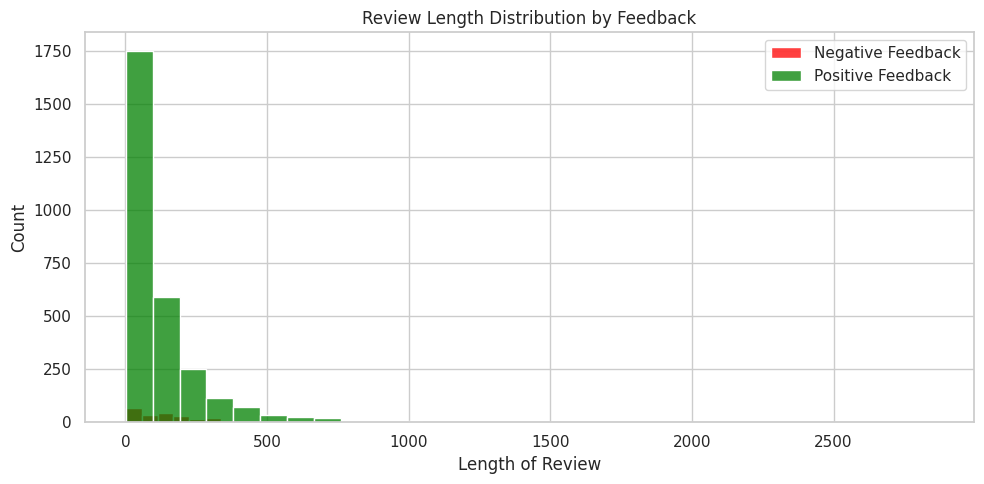

In [34]:
#Review Lengths by Feedback (0 = Negative, 1 = Positive)
plt.figure(figsize=(10, 5))
sns.histplot(df[df['feedback'] == 0]['length'], color='red', label='Negative Feedback', bins=30)
sns.histplot(df[df['feedback'] == 1]['length'], color='green', label='Positive Feedback', bins=30)
plt.title("Review Length Distribution by Feedback")
plt.xlabel("Length of Review")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

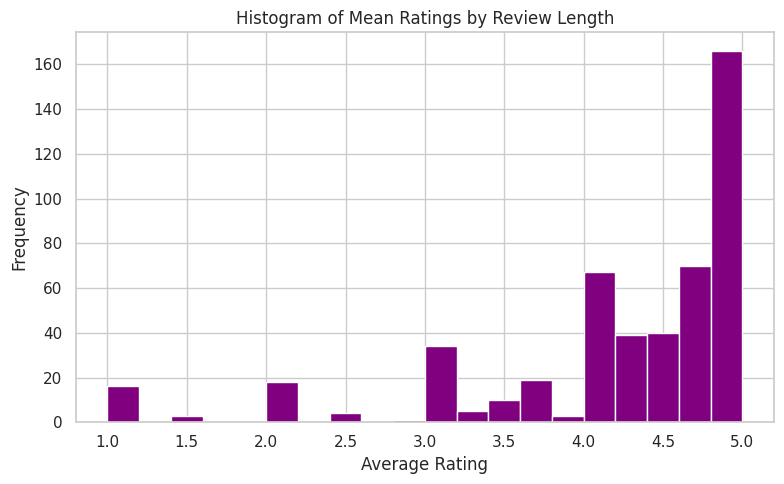

In [35]:
# Group by review length and calculate average rating
mean_rating_by_length = df.groupby('length')['rating'].mean()

plt.figure(figsize=(8, 5))
mean_rating_by_length.plot(kind='hist', bins=20, color='purple')
plt.title("Histogram of Mean Ratings by Review Length")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [36]:
#Setting consisent styling for futher use
def plot_wordcloud(text, title, max_words=50, color='black'):
    wc = WordCloud(width=800,
                   height=400,
                   background_color='white',
                   max_words=max_words,
                   colormap='viridis')
    plt.figure(figsize=(10, 5))
    plt.imshow(wc.generate(text), interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14, color=color)
    plt.tight_layout(pad=0)
    plt.show()

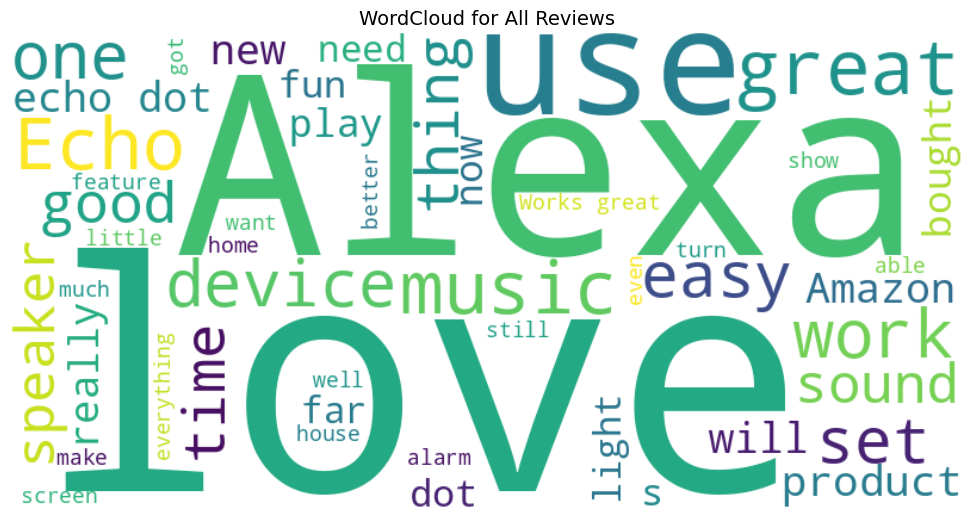

In [37]:
# Combine all reviews
all_reviews = " ".join(df['verified_reviews'].dropna())
plot_wordcloud(all_reviews, "WordCloud for All Reviews")

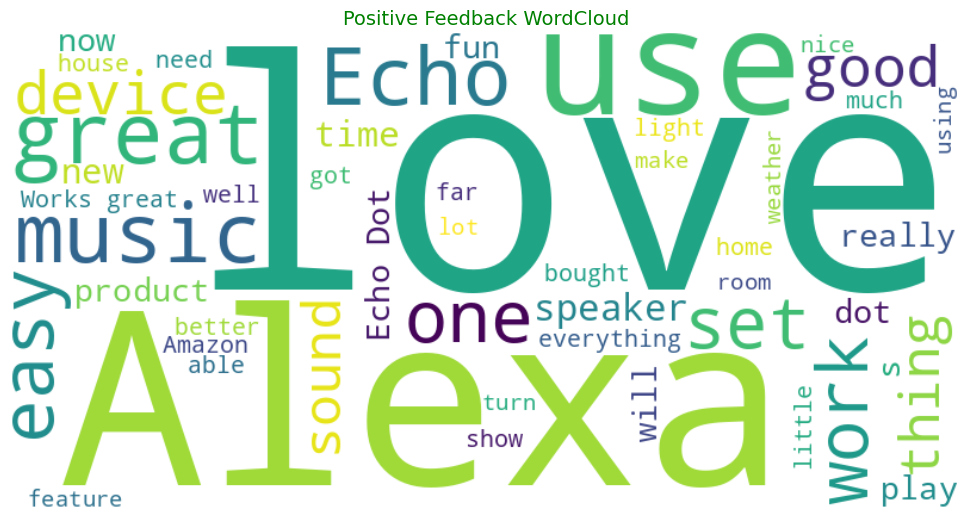

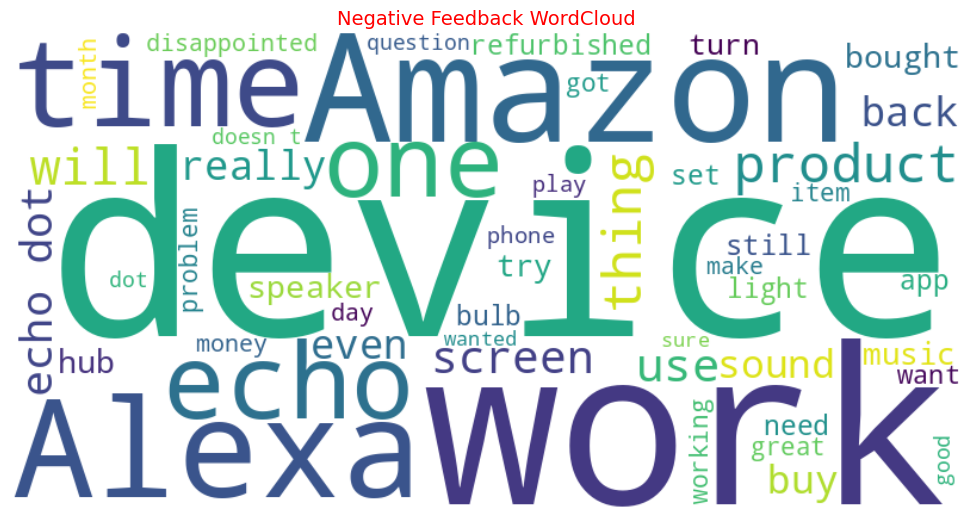

In [38]:
# Combine reviews by feedback
pos_text = " ".join(df[df['feedback'] == 1]['verified_reviews'].dropna())
neg_text = " ".join(df[df['feedback'] == 0]['verified_reviews'].dropna())

plot_wordcloud(pos_text, "Positive Feedback WordCloud", color='green')
plot_wordcloud(neg_text, "Negative Feedback WordCloud", color='red')


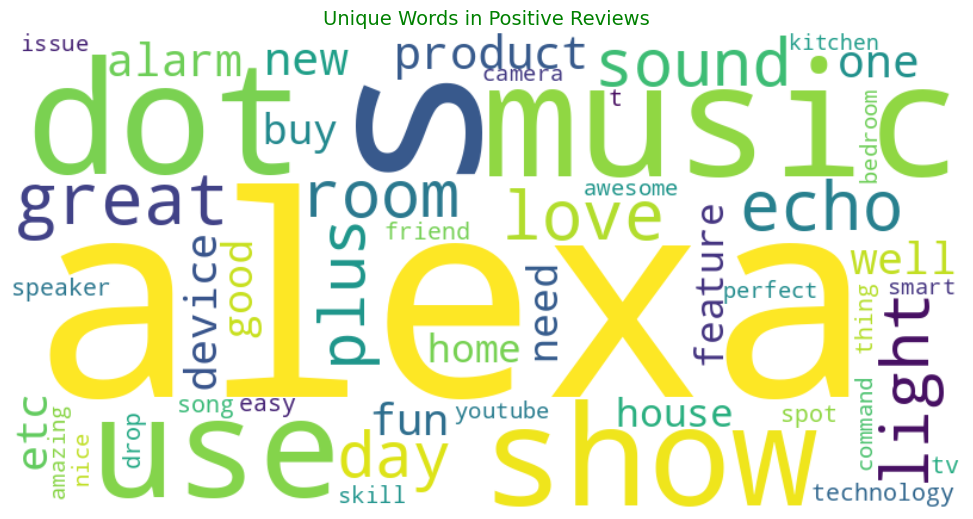

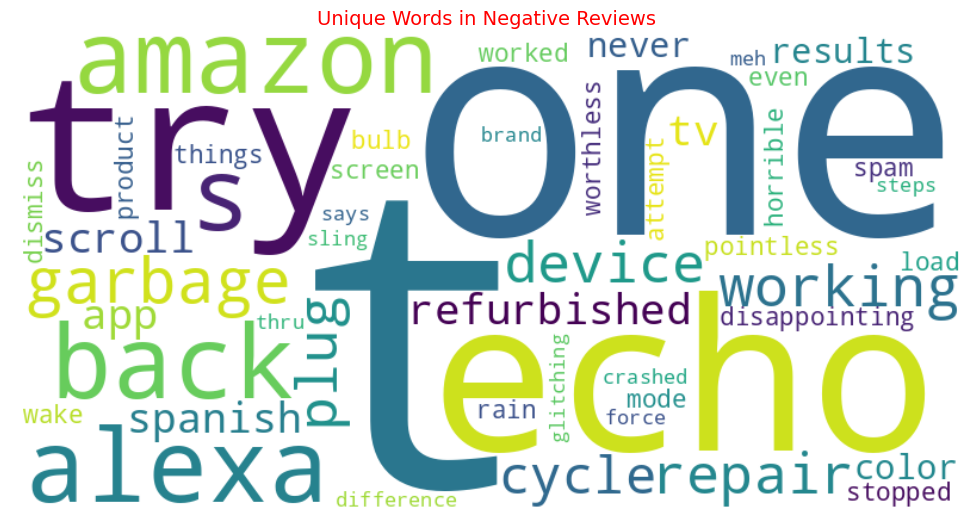

In [39]:
pos_words = set(pos_text.lower().split())
neg_words = set(neg_text.lower().split())

# Words exclusive to one class
unique_pos = " ".join(pos_words - neg_words)
unique_neg = " ".join(neg_words - pos_words)

plot_wordcloud(unique_pos, "Unique Words in Positive Reviews", color='green')
plot_wordcloud(unique_neg, "Unique Words in Negative Reviews", color='red')


In [40]:
def plot_top_words(text, title="Top Words", color='purple', top_n=20):
    vectorizer = CountVectorizer(stop_words='english')
    word_matrix = vectorizer.fit_transform([text])

    # Count word frequencies
    word_counts = word_matrix.toarray().flatten()
    vocab = vectorizer.get_feature_names_out()

    word_freq = pd.DataFrame({'word': vocab, 'count': word_counts})
    word_freq = word_freq.sort_values(by='count', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=word_freq, y='word', x='count', color=color)  # ✅ use 'color' instead of 'palette'
    plt.title(title)
    plt.xlabel("Word Count")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()

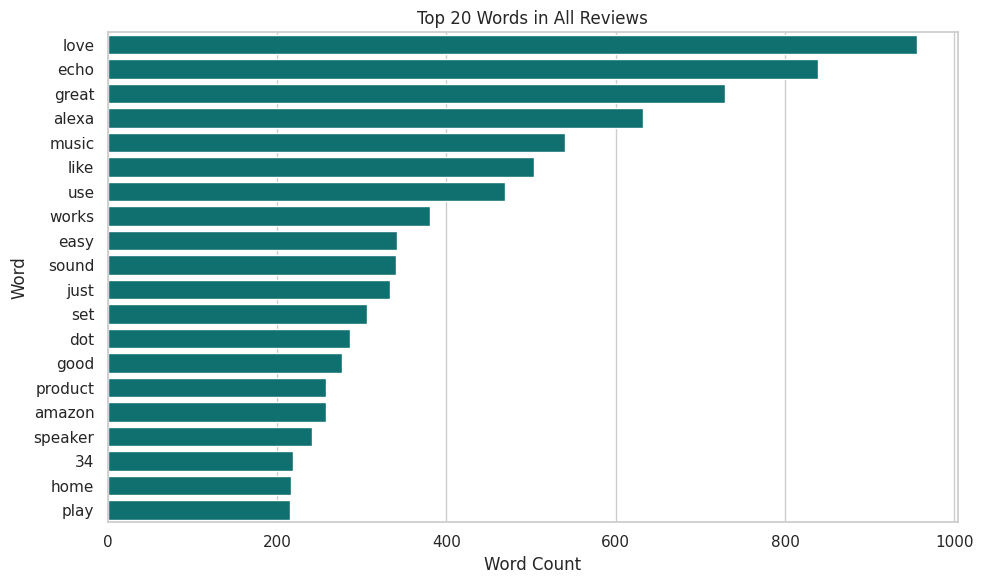

In [41]:
all_text = " ".join(df['verified_reviews'].dropna())
plot_top_words(all_text, "Top 20 Words in All Reviews", color='teal')

## **Preprocessing and Modelling**

cleaning the verified_reviews column:
* Lowercase
* Remove special characters
* Remove digits and punctuation

In [42]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)  # keep only letters and spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text


In [43]:
# Clean & reindex before embeddings
df['cleaned_reviews'] = df['verified_reviews'].apply(clean_text)
df = df.reset_index(drop=True)

# Generate embeddings
embedder = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedder.encode(df['cleaned_reviews'], show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/99 [00:00<?, ?it/s]

In [44]:
X = embeddings
y = df['feedback']  # 1 = positive, 0 = negative

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.25      0.37        63
           1       0.92      0.99      0.95       567

    accuracy                           0.91       630
   macro avg       0.79      0.62      0.66       630
weighted avg       0.90      0.91      0.89       630



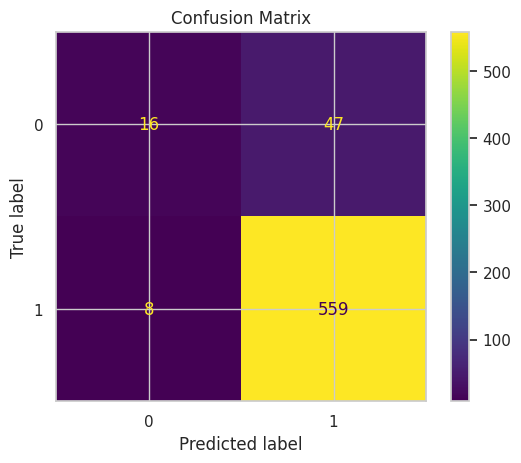

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

In [48]:
def evaluate_models(X, y, cv=5):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SVM (Linear Kernel)": SVC(kernel='linear'),
        "XGBoost": XGBClassifier(eval_metric='logloss')
    }

    results = []

    for name, model in models.items():
        # Perform K-Fold cross-validation
        acc = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
        prec = cross_val_score(model, X, y, cv=cv, scoring='precision').mean()
        rec = cross_val_score(model, X, y, cv=cv, scoring='recall').mean()
        f1 = cross_val_score(model, X, y, cv=cv, scoring='f1').mean()

        results.append({
            'Model': name,
            'Accuracy': round(acc, 4),
            'Precision': round(prec, 4),
            'Recall': round(rec, 4),
            'F1-Score': round(f1, 4)
        })

    # Convert to DataFrame for easy viewing
    return pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)


In [49]:
# X = your embeddings
# y = df['feedback']

model_comparison_df = evaluate_models(X, y, cv=5)
model_comparison_df

,Model,Accuracy,Precision,Recall,F1-Score
4,XGBoost,0.932,0.939,0.991,0.964
3,SVM (Linear Kernel),0.932,0.941,0.988,0.964
0,Logistic Regression,0.931,0.935,0.994,0.964
2,Random Forest,0.926,0.926,0.999,0.962
1,Decision Tree,0.901,0.941,0.951,0.944


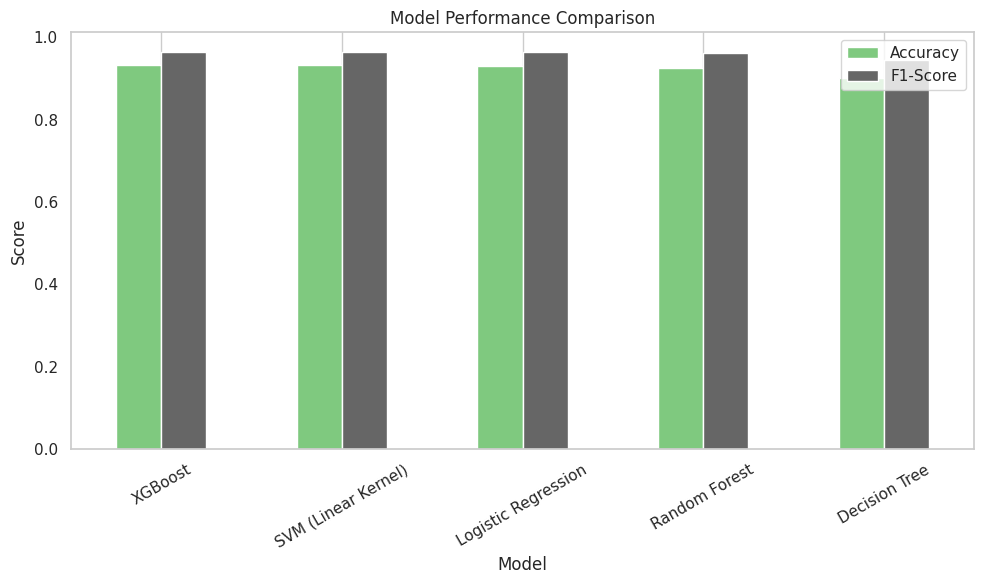

In [50]:
custom_colors = ['#1f77b4', '#ff7f0e']
model_comparison_df.plot(
    x='Model',
    y=['Accuracy', 'F1-Score'],
    kind='bar',
    figsize=(10, 6),
    colormap= 'Accent',
    ylabel='Score',
    title='Model Performance Comparison',
    rot=30
)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 🔍 Why Logistic Regression is the Best Choice Here

Even though:

* **XGBoost** and **SVM** technically performed *slightly* better in a few metrics,
* The **F1-Score is exactly the same (0.964)** across the top 3 models,
* The difference in performance is **statistically insignificant** (less than 0.2%)

---

### ✅ Reasons to Stick With **Logistic Regression**

| ✅ Reason                                  | 🔎 Explanation                                                                                     |
| ----------------------------------------- | -------------------------------------------------------------------------------------------------- |
| **Lightweight**                           | Very fast to train and predict                                                                     |
| **Easy to Interpret**                     | Coefficients directly show impact of features                                                      |
| **Easy to Deploy**                        | Works great with `joblib`, easy to serve in Flask                                                  |
| **No complex dependencies**               | No need for large model files like XGBoost                                                         |
| **Stable performance**                    | Consistent results across all cross-validation folds                                               |
| **Works well with BERT-style embeddings** | Sentence embeddings already capture deep semantic relationships, so a simple model is often enough |



# Saving the Models

In [51]:
save_path = "/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/"

# Save the model and embedder there
joblib.dump(final_model, save_path + 'sentiment_model.pkl')
joblib.dump(embedder, save_path + 'embedder.pkl')


NameError: name 'final_model' is not defined